# Adaboost(ロジスティック回帰)

In [375]:
library(ggplot2)

In [376]:
df <- read.csv("Newmodel-data.csv",header=T)
dat <- df[, c(11,3,4,5,6,7,8,9,10)]
odd.number <- 2*(1:113)
odd.data <- dat[odd.number,]
even.data <- dat[-odd.number,]
dat.data <- rbind(odd.data, even.data)
even.data

,natorcong,alpha,beta,gamma,delta,epsilon,zeta,eta,theta
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
1,0,14.400000,0.4333333,0.4333333,0.6111111,1,0,0,0.5714286
3,0,12.200000,0.4333333,0.4188889,0.6666667,1,0,0,0.4452555
5,0,14.533333,0.8000000,0.8000000,0.6559633,2,0,0,0.4746835
7,0,22.233333,0.6000000,0.6000000,0.6596702,1,0,0,0.4829787
9,0,21.333333,0.4000000,0.4000000,0.6593750,1,0,0,0.4823009
11,0,22.066667,0.6000000,0.6000000,0.6631420,1,0,0,0.4754797
13,0,18.233333,0.1333333,0.1333333,0.6398537,1,0,0,0.5184211
15,0,2.466667,0.0000000,0.0000000,0.4459459,1,0,0,0.6507937
17,0,10.900000,0.2000000,0.2000000,0.6330275,1,0,0,0.5063291


In [377]:
adaboosting <- function(object, data, iter){ #一列目に応答数
    true_data <- data[,1]
    D_1 <- c()
    for (i in 1:nrow(data)){
        D_1 <- append(D_1, 1/nrow(data))
    }
    D_m <- matrix( , , nrow(data))
    D_m <- rbind(D_m, D_1)
    h_m <- list()
    Alpha_m <- c()
    ret <- list()
    for (i in 1:iter){
        dat0 <- data[,-1]
        dat <- cbind(object=data[,1], dat0*D_m[i+1,])
        h_m <- append(h_m, list(glm(dat$object~., data=dat, family=gaussian())))
        pred <- predict(h_m[[i]], data)
        pred[pred>=0.5] <- 1
        pred[pred<0.5] <- 0 
        E_m <- c()
        d_m <- c()
        for (j in 1:nrow(data)){
            if (pred[j] == true_data[j]){
                E_m <- append(E_m, 0)
                d_m <- append(d_m, D_m[i+1,j])
            } else {
                E_m <- append(E_m, D_m[i+1,j])
                d_m <- append(d_m, D_m[i+1,j])
            }
        }
        E_m <- sum(E_m)/sum(d_m)
        Alpha_m <- append(Alpha_m, log((1-E_m)/E_m))
        Alpha_m[is.infinite(Alpha_m)] <- 0
        d_m <- c()
        for (j in 1:nrow(data)){
            if (pred[j] == true_data[j]){
                d_m <- append(d_m, D_m[i+1,j])
            } else {
                d_m <- append(d_m, D_m[i+1,j]*exp(Alpha_m[i]))
            }
        }
        D_m <- rbind(D_m, d_m)
        ret <- append(ret, c(h_m[i], Alpha_m[i]))
    }
    return (ret) 
}

In [378]:
even.data$natorcong <- as.numeric(as.character(even.data$natorcong))
odd.data$natorcong <- as.numeric(as.character(odd.data$natorcong))
even.data2 <- even.data[,-c(3,7,8)]
odd.data2 <- odd.data[,-c(3,7,8)]
o.ada <- adaboosting(natorcong, odd.data2, 10)
o.ada

[[1]]

Call:  glm(formula = dat$object ~ ., family = gaussian(), data = dat)

Coefficients:
(Intercept)        alpha        gamma        delta      epsilon        theta  
     0.3705      -0.9919    -123.8771      38.9440      15.7709     -18.4211  

Degrees of Freedom: 112 Total (i.e. Null);  107 Residual
Null Deviance:	    11.5 
Residual Deviance: 6.46 	AIC: 11.29

[[2]]
[1] 3.305054

[[3]]

Call:  glm(formula = dat$object ~ ., family = gaussian(), data = dat)

Coefficients:
(Intercept)        alpha        gamma        delta      epsilon        theta  
     0.4194      -1.1034    -107.3662      44.7592       5.6918     -21.2854  

Degrees of Freedom: 112 Total (i.e. Null);  107 Residual
Null Deviance:	    11.5 
Residual Deviance: 6.773 	AIC: 16.65

[[4]]
[1] 1.904614

[[5]]

Call:  glm(formula = dat$object ~ ., family = gaussian(), data = dat)

Coefficients:
(Intercept)        alpha        gamma        delta      epsilon        theta  
     0.4101      -0.9170    -100.5370      45.01

In [379]:
obj <- matrix(, , nrow(even.data2))
for (i in 2*(1:(length(o.ada)/2))){
    obj <- rbind(obj, o.ada[[i]]*predict(o.ada[[i-1]], even.data2))
}
logistic.ada <- 1/(1+exp(-colSums(obj[-1,])))
logistic.ada2 <- 1/(1+exp(-colSums(obj[-1,])))
logistic.ada2[logistic.ada2>=0.5] <- 1
logistic.ada2[logistic.ada2<0.5] <- 0
correct <- 100*sum(logistic.ada2==even.data2$natorcong)/nrow(even.data2)
names(correct) <- "正解率"
correct

正解率 
92.92035

In [380]:
logistic <- 1/(1+exp(predict(o.ada[[1]], even.data2)))

In [381]:
index <- transform(transform(logistic.ada, 残差=even.data2[,1]-logistic.ada), Species="adaboost")
               #transform(transform(logistic, 残差=even.data2[,1]-logistic), Species="logistic"))

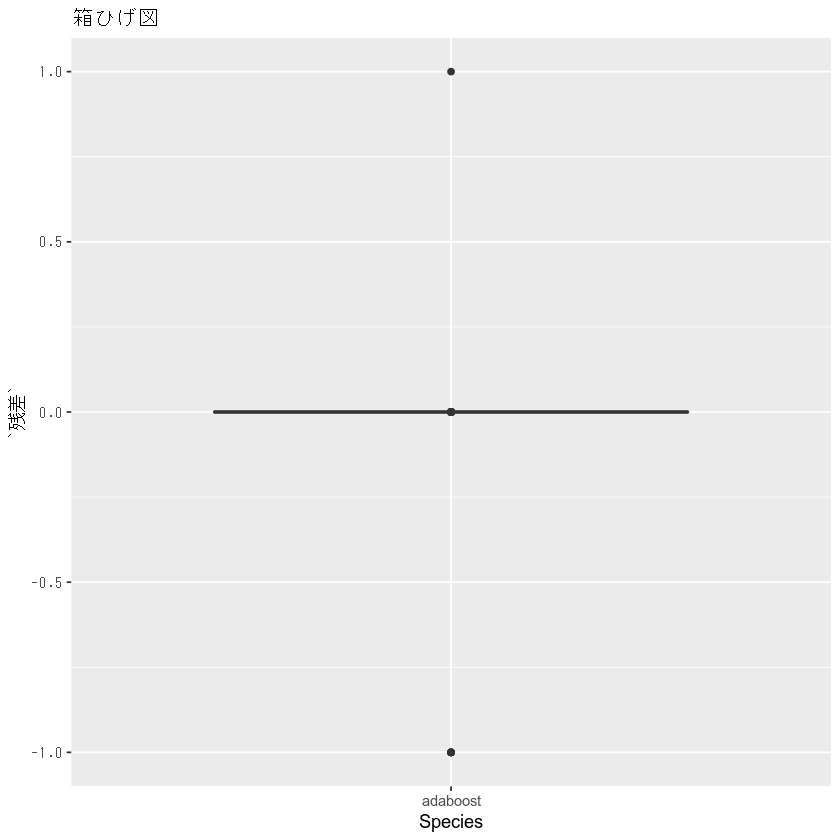

In [382]:
ggplot(index,aes(x=Species,y=残差))+geom_boxplot()+labs(title="箱ひげ図")

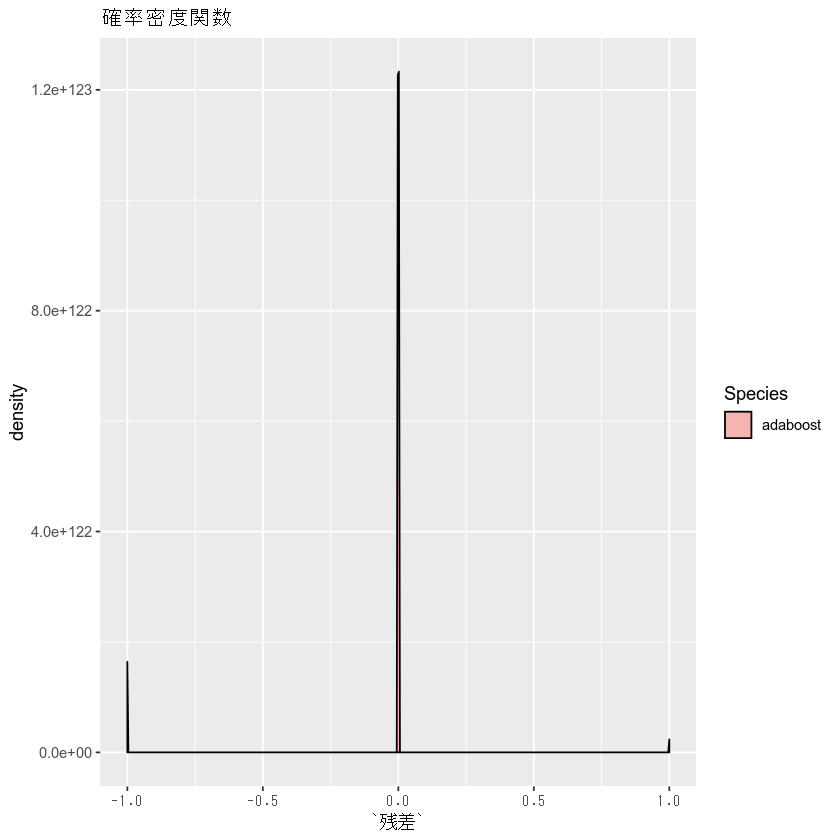

In [383]:
ggplot(index, aes(x = 残差))+geom_density(aes(fill=Species),size=0.5,alpha=0.5)+labs(title="確率密度関数")